In [576]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stat
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [577]:
df = pd.read_csv("C:/Project/Electricity_project/GlobalUtility_EY_04052023/RawDataset/GlobalEYUtility_Final_for Demo.csv",delimiter=',')
df = df[:300]
print(df.shape)
df.head()

(300, 119)


,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_Times_Exceeded100_,No_of_times_exceeded_60_,No_of_time_below_60_,No_of_Times_Exceeded90_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Peak_Slab,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,IR_Value_After_JointingPHASE_TO,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon,New_Winter,_dataobs_,Feeder,Switch,Section Id,Pathid,Path Order,Lat,Long,Customer At Risk,Revenue At Rsik,Assets At Risk,Risk Type,NoFaultsSince2016
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,0.0,96.0,0.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.55125,1.565161,43.99,M,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,250.0,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.5,9.08,0.0,0.0,M,M,N,N,N,Y,379.0,30462.0,10499.0,30462-10499-1,SANTACRUZ RECEIVING STATION-ANAND NAGAR NO.2 S...,2.0,19.080542,72.845893,8000.0,97.0,10.0,Low,0.0
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,0.0,96.0,0.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.10000,0.100000,19.24,M,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,350.0,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.1,18.46,0.0,0.0,M,M,N,N,N,Y,705.0,30462.0,10499.0

In [578]:
df.target.value_counts()

target
1.0    174
0.0    126
Name: count, dtype: int64

In [579]:
for i in df.columns:
    print(i)

abin
Feeder_Category
BREAKER_MAKE
UpcaseRoadTraffic
Upcase_DepthOfCable
Upcase_SoilCondition
Upcase_LeadExposed
Upcase_ArmourCableCondition
CABLE_SIZE
NO__OF_PARALLEL_RUNNING_CABLES
FaultCurrent_Count
_5Yr_Faults_Count
No_of_Load_transfer_Operations
No_of_Times_Exceeded100_
No_of_times_exceeded_60_
No_of_time_below_60_
No_of_Times_Exceeded90_
LENGTH_OF_CABLE_MTRS_
NO__OF_JOINTS
AGE_YRS_
Number_OF_Cables
PILC
XLPE
DATE_ONLY
DAY_OF_WEEK
WEEKEND_Y_N_
Average_Current
MORNING_AVG_CURRENT
AFTERNOON_AVG_CURRENT
EVENING_AVG_CURRENT
Peak_Current
Peak_Slab
Average_voltage
MORNING_AVG_VOLTAGE
AFTERNOON_AVG_VOLTAGE
EVENING_AVG_VOLTAGE
Peak_Voltage
target
Avg_Heat_Index
Morning_AVG_Heat_Index
Afternoon_AVG_Heat_Index
Evening_Avg_Heat_Index
Peak_HI
Avg_humidity
Morning_AVG_humidity
Afternoon_AVG_HUMIDITY
Evening_Avg_HUMIDITY
Max_Humidity
Avg_TEMP
Morning_AVG_TEMP
Afternoon_AVG_TEMP
Evening_Avg_TEMP
Max_TEMP
IR_Value_After_JointingPHASE_TO
MORNING_AVG_CURRENT_N_1
MORNING_AVG_CURRENT_N_2
AFTERNOON_AVG

In [580]:
try:
    df.drop(columns=['No_of_Times_Exceeded100_',
                     'MORNING_AVG_CURRENT',
                        'AFTERNOON_AVG_CURRENT',
                        'EVENING_AVG_CURRENT',
                     'MORNING_AVG_VOLTAGE',
                        'AFTERNOON_AVG_VOLTAGE',
                        'EVENING_AVG_VOLTAGE',
                     'Morning_AVG_Heat_Index',
                    'Afternoon_AVG_Heat_Index',
                    'Evening_Avg_Heat_Index',
                
                     'Morning_AVG_humidity',
                    'Afternoon_AVG_HUMIDITY',
                    'Evening_Avg_HUMIDITY',
                
                     'Morning_AVG_TEMP',
                        'Afternoon_AVG_TEMP',
                        'Evening_Avg_TEMP',
                    
                     '_5Yr_Faults_Count',
                     'FaultCurrent_Count',
                    'No_of_Times_Exceeded90_',
                     'No_of_time_below_60_',
                    'Peak_Slab',
                     'abin',
                     'BREAKER_MAKE',
                     'DATE_ONLY',
                        'DAY_OF_WEEK',
                        'WEEKEND_Y_N_',
                     'Upcase_DepthOfCable',
                     'NO__OF_PARALLEL_RUNNING_CABLES',
                     'IR_Value_After_JointingPHASE_TO',
                     'MORNING_AVG_CURRENT_N_1',
                    'MORNING_AVG_CURRENT_N_2',
                    'AFTERNOON_AVG_CURRENT_N_1',
                    'AFTERNOON_AVG_CURRENT_N_2',
                    'EVENING_AVG_CURRENT_N_1',
                    'EVENING_AVG_CURRENT_N_2',
                    'MORNING_AVG_VOLTAGE_N_1',
                    'MORNING_AVG_VOLTAGE_N_2',
                    'AFTERNOON_AVG_VOLTAGE_N_1',
                    'AFTERNOON_AVG_VOLTAGE_N_2',
                    'EVENING_AVG_VOLTAGE_N_1',
                    'EVENING_AVG_VOLTAGE_N_2',
                    'TARGET_N_1',
                    'TARGET_N_2',
                    'AVERAGE_CURRENT_N_1',
                    'AVERAGE_CURRENT_N_2',
                    'AVERAGE_VOLTAGE_N_1',
                    'AVERAGE_VOLTAGE_N_2',
                    'AVERAGE_HEAT_INDEX_N_1',
                    'AVERAGE_HEAT_INDEX_N_2',
                    'AVERAGE_HUMUDITY_N_1',
                    'AVERAGE_HUMUDITY_N_2',
                    'AVERAGE_TEMP_N_1',
                    'AVERAGE_TEMP_N_2',
                    'MORNING_AVG_HEAT_INDEX_N_1',
                    'MORNING_AVG_HEAT_INDEX_N_2',
                    'AFTERNOON_AVG_HEAT_INDEX_N_1',
                    'AFTERNOON_AVG_HEAT_INDEX_N_2',
                    'EVENING_AVG_HEAT_INDEX_N_1',
                    'EVENING_AVG_HEAT_INDEX_N_2',
                    'MORNING_AVG_HUMUDITY_N_1',
                    'MORNING_AVG_HUMUDITY_N_2',
                    'AFTERNOON_AVG_HUMUDITY_N_1',
                    'AFTERNOON_AVG_HUMUDITY_N_2',
                    'EVENING_AVG_HUMUDITY_N_1',
                    'EVENING_AVG_HUMUDITY_N_2',
                    'MORNING_AVG_TEMP_N_1',
                    'MORNING_AVG_TEMP_N_2',
                    'AFTERNOON_AVG_TEMP_N_1',
                    'AFTERNOON_AVG_TEMP_N_2',
                    'EVENING_AVG_TEMP_N_1',
                    'EVENING_AVG_TEMP_N_2',
                    'Peak_Current_N_1',
                    'Peak_Current_N_2',
                    'Peak_Current_Time_N_1',
                    'Peak_Current_Time_N_2',
                    'Peak_Current_Slab_N_1',
                    'Peak_Current_Slab_N_2',
                     'New_PublicHoliday',
                     '_dataobs_',
                     'Feeder',
                     'Switch',
                     'Upcase_LeadExposed',
                     'Section Id',
                     'Pathid',
                    'Path Order',
                     'Lat',
                     'Long',
                    'No_of_Load_transfer_Operations',
                   'Number_OF_Cables',
                     'Customer At Risk',
                     'Revenue At Rsik',
                     'Assets At Risk',
                     'Risk Type',
                     'NoFaultsSince2016',
                    'UpcaseRoadTraffic','Upcase_SoilCondition','Upcase_ArmourCableCondition'], inplace=True)
    print("Deleted successfully")
except Exception as e:
    print(e)

Deleted successfully


In [581]:
df['target'].value_counts(normalize=True)*100

target
1.0    58.0
0.0    42.0
Name: proportion, dtype: float64

In [582]:
df.head()

,Feeder_Category,CABLE_SIZE,No_of_times_exceeded_60_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,PILC,XLPE,Average_Current,Peak_Current,Average_voltage,Peak_Voltage,target,Avg_Heat_Index,Peak_HI,Avg_humidity,Max_Humidity,Avg_TEMP,Max_TEMP,New_Summer,New_Monsoon,New_Winter
0,RES,120.0,0.0,586.6,7.0,36.0,1.0,1.0,4.352917,43.99,11.047187,11.20,1.0,26.667515,31.224829,60.078646,79.34,25.887917,31.11,N,N,Y
1,RES,300.0,0.0,533.1,5.0,NaN,0.0,1.0,4.416875,19.24,11.021667,11.27,1.0,24.975674,28.202562,69.590937,76.92,23.927083,27.30,N,N,Y
2,RES,300.0,0.0,600.0,2.0,NaN,0.0,1.0,14.331250,20.80,11.066146,11.49,1.0,25.394108,29.479176,62.813750,73.11,23.755521,29.36,N,N,Y
3,RES,240.0,0.0,682.5,5.0,23.0,1.0,0.0,27.535312,109.47,11.221042,11.41,1.0,25.914466,28.942341,50.201458,64.66,24.734896,30.33,N,N,Y
4,RES,240.0,0.0,381.0,4.0,20.0,1.0,0.0,0.845625,80.23,11.077917,11.39,1.0,26.553766,32.863735,64.328646,74.42,25.372917,31.12,N,N,Y


In [583]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [584]:
cat_col = [i for i in df.columns if df[i].dtype == 'object']
num_col = [i for i in df.columns if df[i].dtype == 'float64']

In [585]:
df[cat_col].isna().sum()

Feeder_Category    17
New_Summer          0
New_Monsoon         0
New_Winter          0
dtype: int64

In [586]:
df['Feeder_Category'].fillna('RES',inplace=True)

In [587]:
df[cat_col].isna().sum()

Feeder_Category    0
New_Summer         0
New_Monsoon        0
New_Winter         0
dtype: int64

In [588]:
df[num_col].isna().sum()

CABLE_SIZE                   0
No_of_times_exceeded_60_     0
LENGTH_OF_CABLE_MTRS_        0
NO__OF_JOINTS                8
AGE_YRS_                    47
PILC                         0
XLPE                         0
Average_Current              0
Peak_Current                 0
Average_voltage              0
Peak_Voltage                 0
target                       0
Avg_Heat_Index               0
Peak_HI                      0
Avg_humidity                 0
Max_Humidity                 0
Avg_TEMP                     0
Max_TEMP                     0
dtype: int64

In [589]:
## Filling the missing values of NO__OF_JOINTS and AGE_YRS_ with mean of respective features

df['NO__OF_JOINTS'].fillna(df['NO__OF_JOINTS'].mean(),inplace=True)
df['AGE_YRS_'].fillna(df['AGE_YRS_'].mean(),inplace=True)

In [590]:
df[num_col].isna().sum()

CABLE_SIZE                  0
No_of_times_exceeded_60_    0
LENGTH_OF_CABLE_MTRS_       0
NO__OF_JOINTS               0
AGE_YRS_                    0
PILC                        0
XLPE                        0
Average_Current             0
Peak_Current                0
Average_voltage             0
Peak_Voltage                0
target                      0
Avg_Heat_Index              0
Peak_HI                     0
Avg_humidity                0
Max_Humidity                0
Avg_TEMP                    0
Max_TEMP                    0
dtype: int64

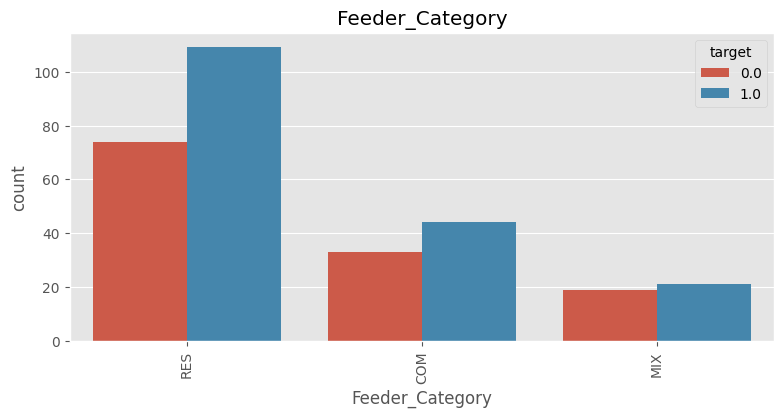

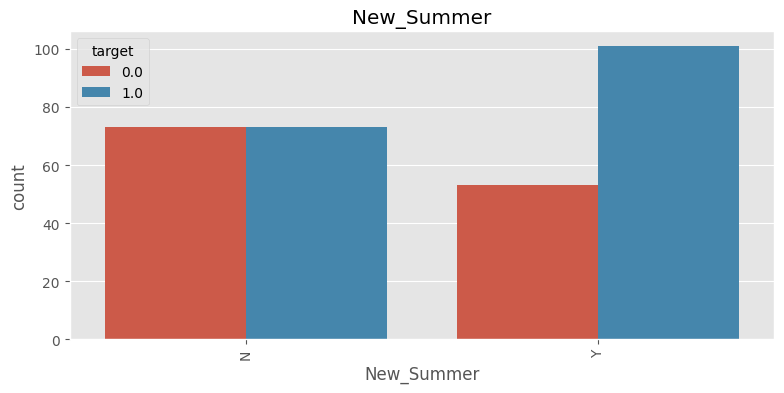

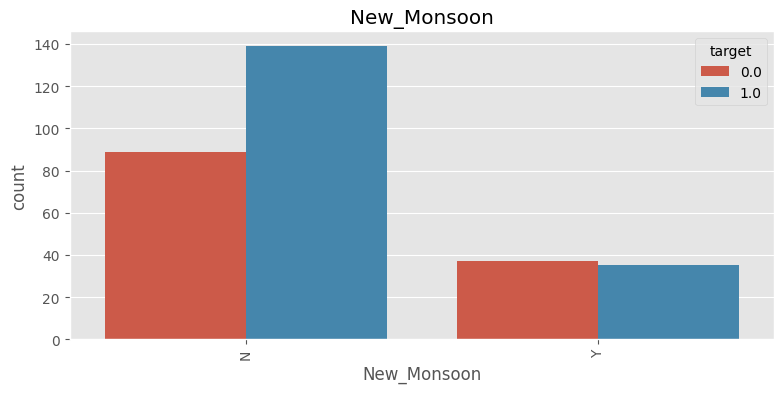

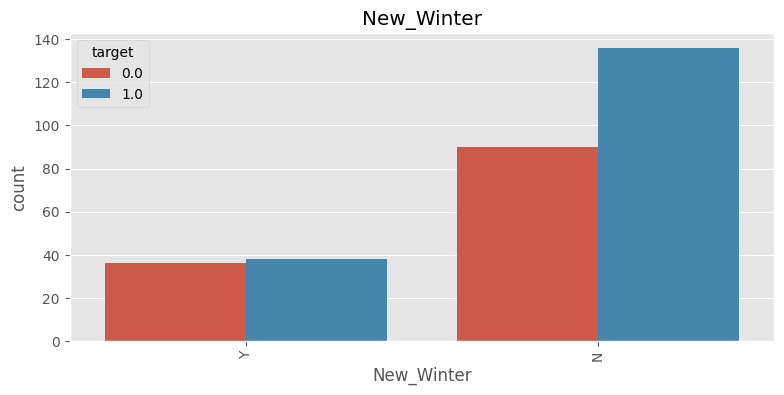

In [591]:
plt.style.use("ggplot")
for col in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data=df[cat_col],x=col, hue=df['target'])
    plt.title(col)    
    plt.xticks(rotation=90)

In [592]:
df[num_col].describe()

,CABLE_SIZE,No_of_times_exceeded_60_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,PILC,XLPE,Average_Current,Peak_Current,Average_voltage,Peak_Voltage,target,Avg_Heat_Index,Peak_HI,Avg_humidity,Max_Humidity,Avg_TEMP,Max_TEMP
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0000,300.000000,300.000000
mean,233.956833,4.560000,1035.022703,9.571918,22.750988,0.736667,0.683333,47.027596,112.944800,10.720725,11.084800,0.580000,32.888793,39.427760,76.306048,86.5050,28.267487,32.236533
std,67.976865,11.768946,584.411411,6.874287,11.474461,0.441178,0.465953,41.829359,105.995085,1.658994,1.449088,0.494383,5.083014,5.744208,13.965015,9.8724,2.031507,2.247094
min,0.150000,0.000000,114.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.585061,28.202562,47.395313,61.9600,22.242812,26.220000
25%,240.000000,0.000000,585.775000,4.000000,15.000000,0.000000,0.000000,12.548281,49.192500,10.985937,11.210000,0.000000,28.522308,34.630884,64.549688,80.1850,26.849010,30.745000
50%,240.000000,0.000000,901.300000,8.000000,22.000000,1.000000,1.000000,36.659010,105.870000,11.034635,11.270000,1.000000,32.629315,38.924033,76.432396,87.2850,28.100729,32.875000
75%,300.000000,3.000000,1346.482500,13.000000,26.000000,1.000000,1.000000,70.110495,156.610000,11.074974,11.340000,1.000000,36.057564,43.707857,86.711172,93.2575,29.946146,33.942500
max,300.000000,93.000000,4020.000000,38.000000,52.000000,1.000000,1.000000,224.603750,1065.500000,11.223854,11.540000,1.000000,44.559584,50.894160,99.988542,100.0000,31.711979,36.970000


CABLE_SIZE


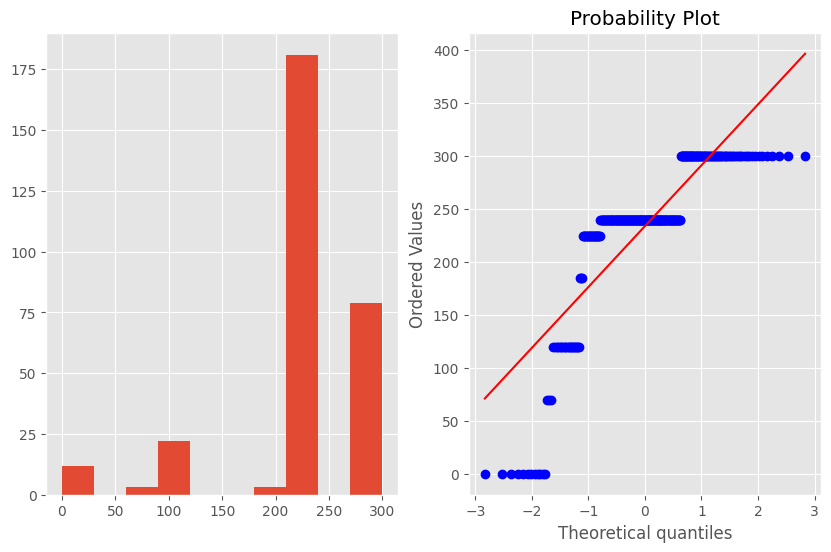

No_of_times_exceeded_60_


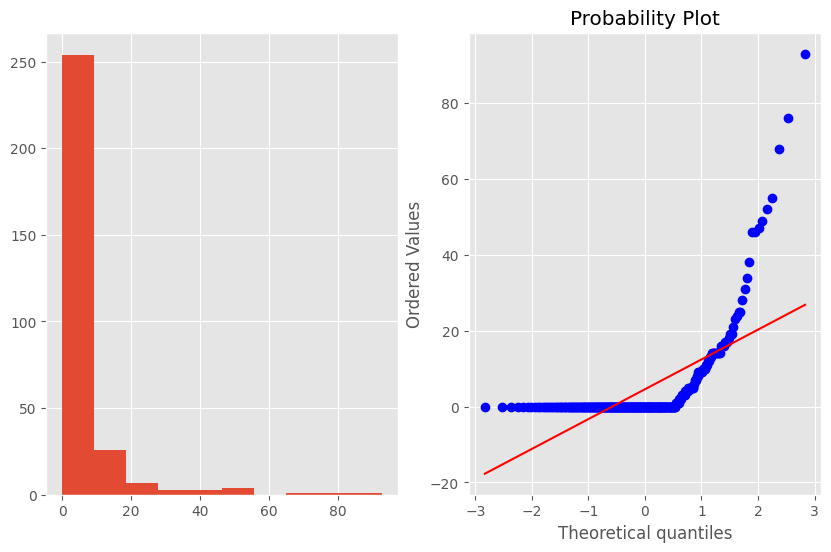

LENGTH_OF_CABLE_MTRS_


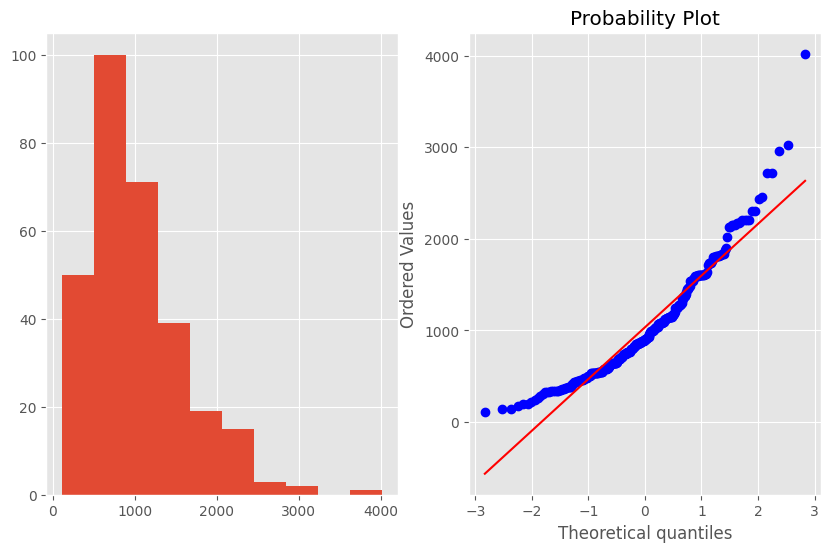

NO__OF_JOINTS


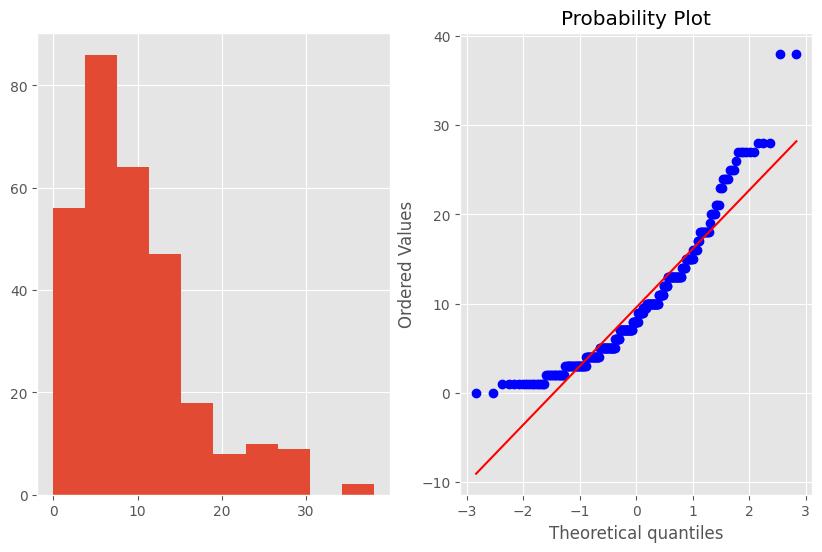

AGE_YRS_


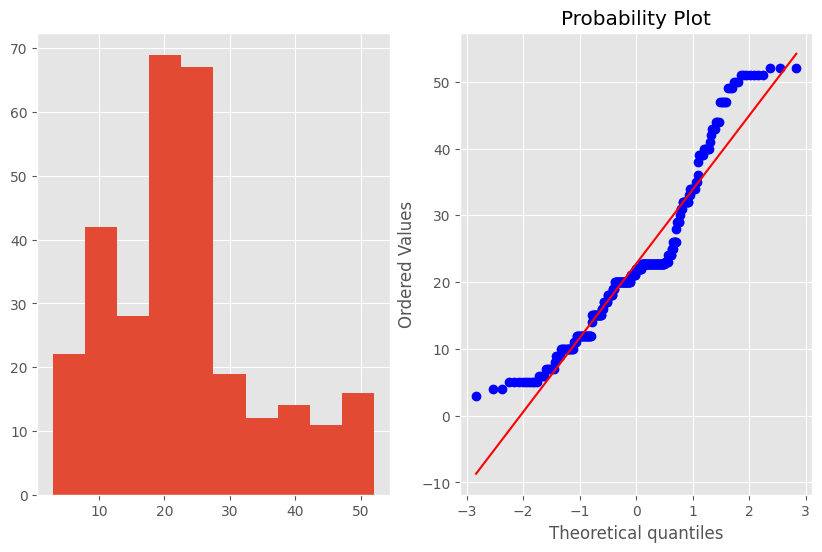

PILC


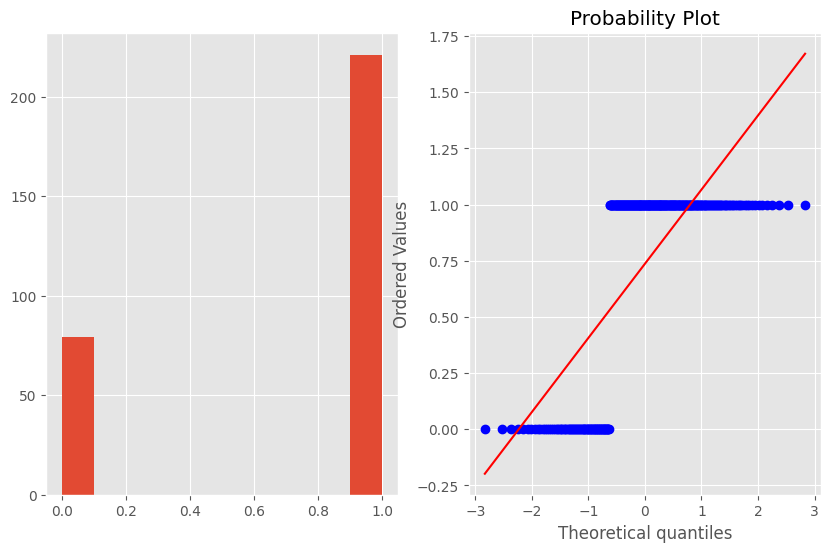

XLPE


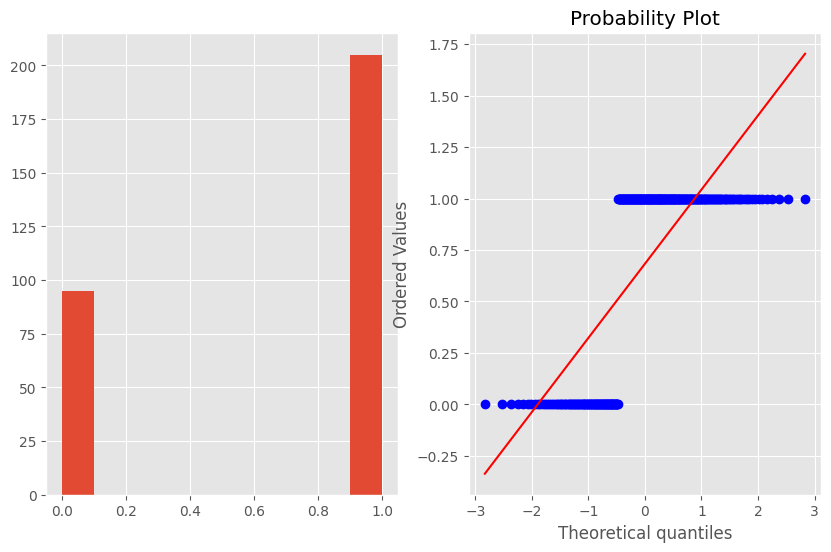

Average_Current


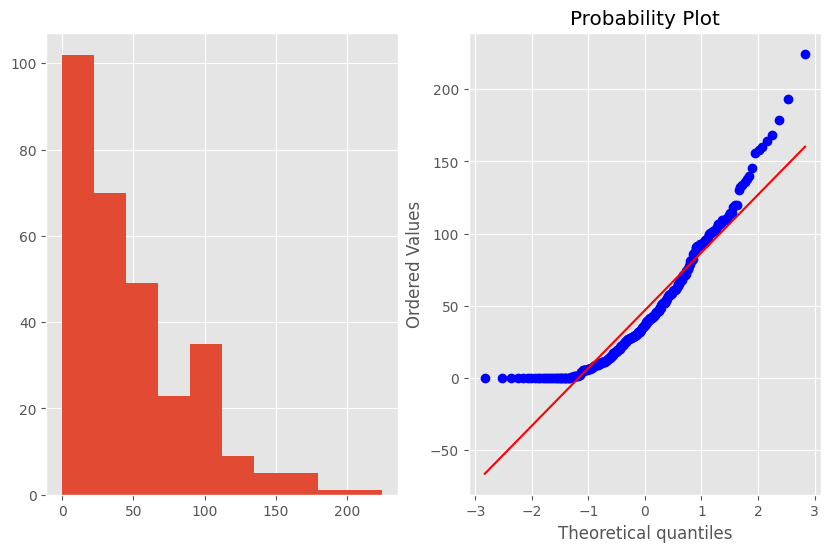

Peak_Current


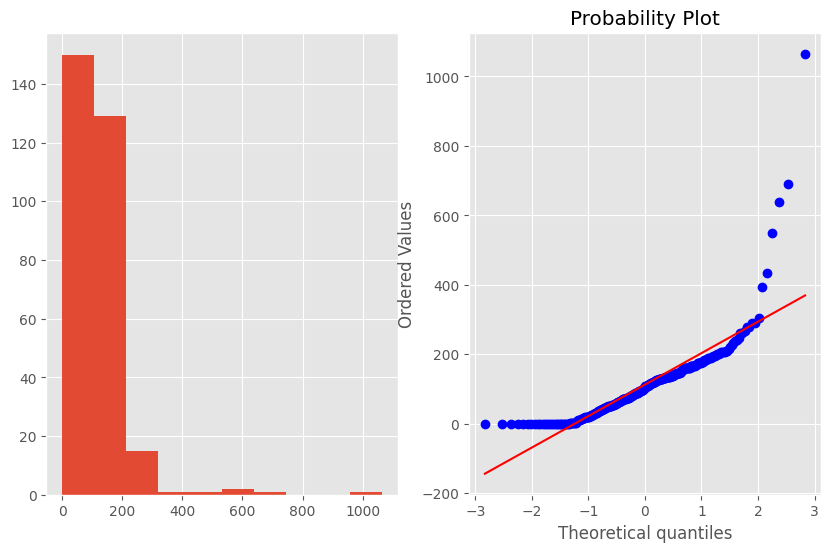

Average_voltage


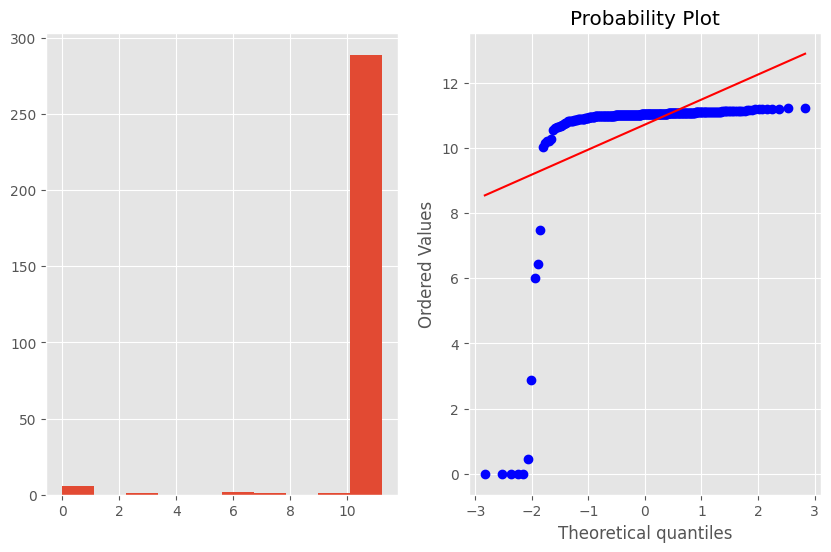

Peak_Voltage


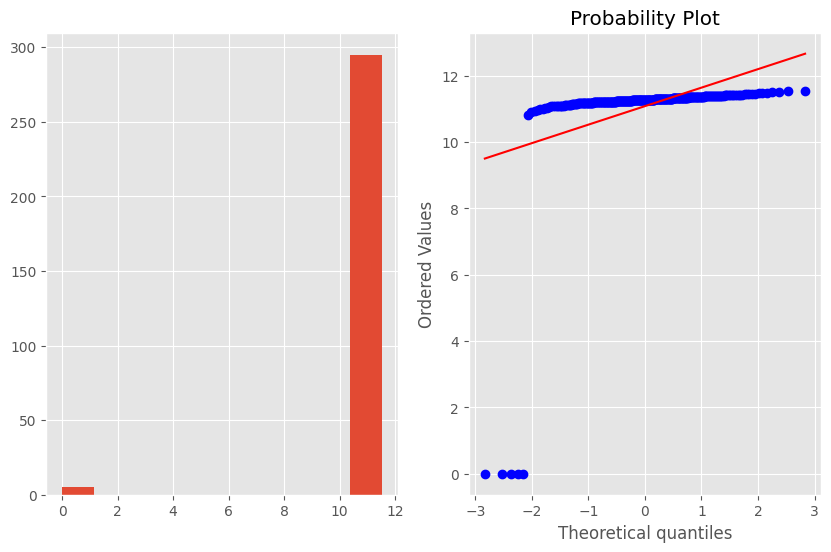

target


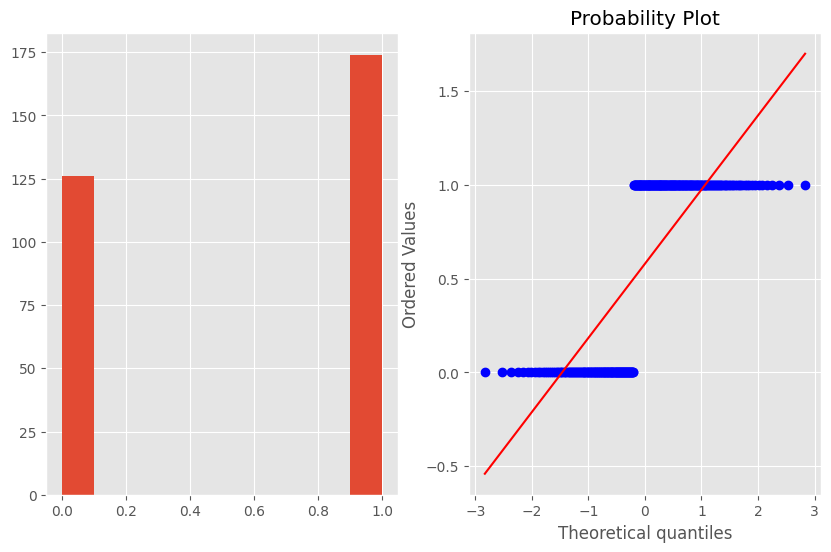

Avg_Heat_Index


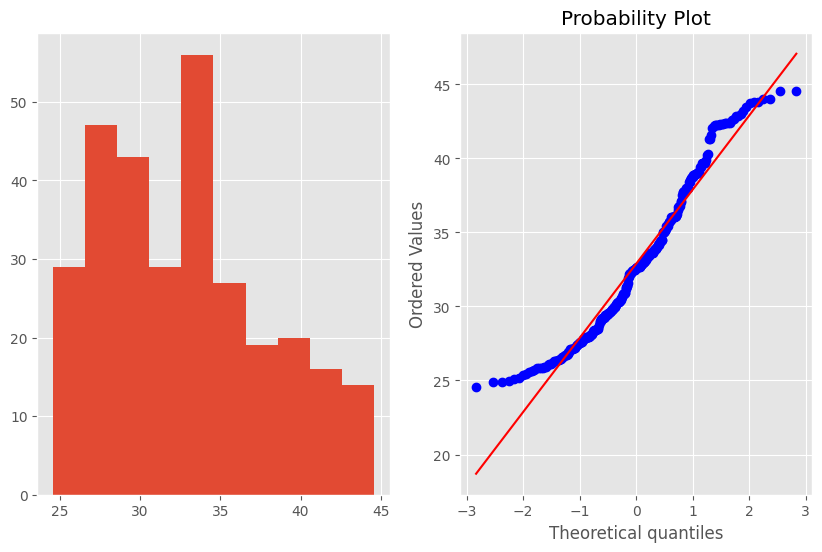

Peak_HI


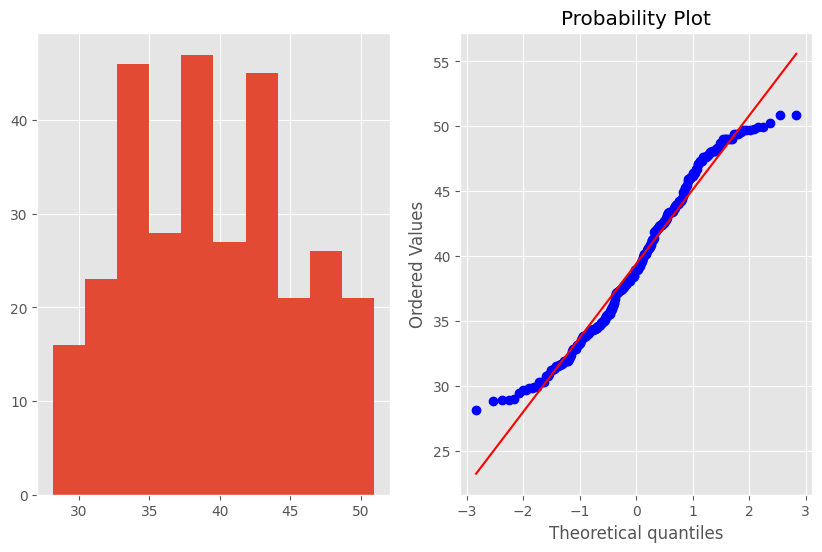

Avg_humidity


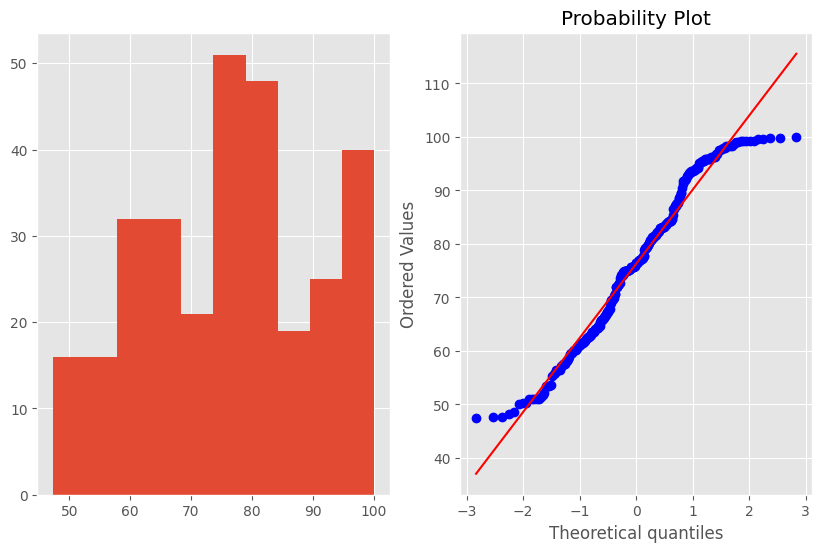

Max_Humidity


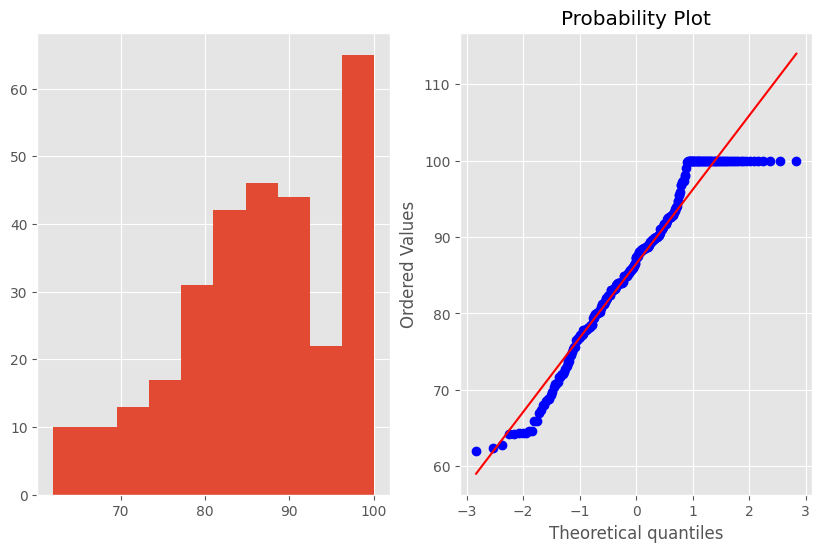

Avg_TEMP


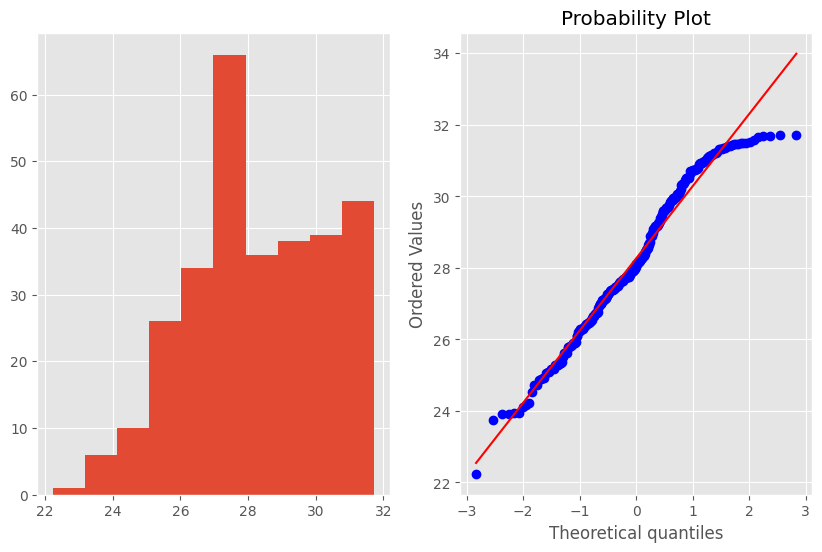

Max_TEMP


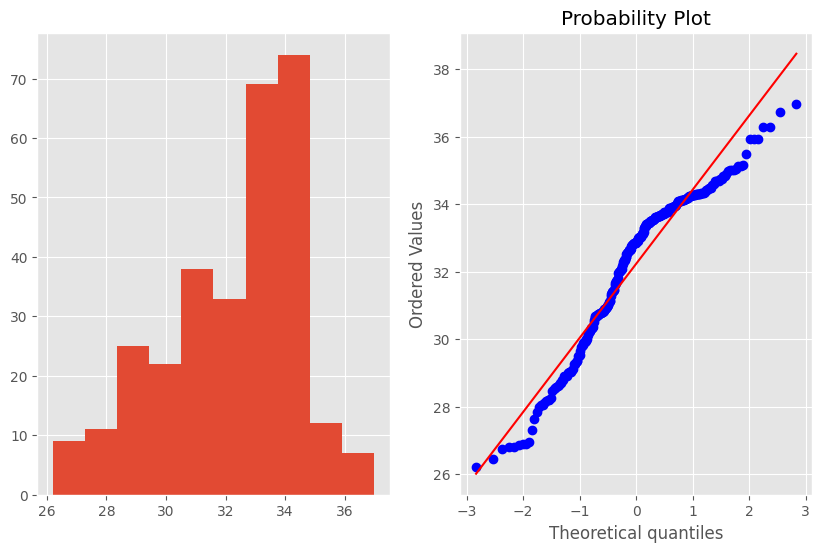

In [593]:
## Plotting Q-Q plot to see the distribution : 
for i in num_col:
    print(i)
    plot_data(df,i)

In [594]:
## Feeder_Category
df['Feeder_Category'] = df['Feeder_Category'].map({
                                                    'RES':0,
                                                    'COM':1,
                                                    'MIX':2})
"""## UpcaseRoadTraffic
df['UpcaseRoadTraffic'] = df['UpcaseRoadTraffic'].map({
    'HEAVY':0,
    'MODERATE':1,
    'LOW':2})

## Upcase_SoilCondition
df['Upcase_SoilCondition'] = df['Upcase_SoilCondition'].map({
    'DRY':0,
    'MOIST':1,
    'WET':2,
    'ROCKY':3})

## Upcase_ArmourCableCondition
df['Upcase_ArmourCableCondition'] = df['Upcase_ArmourCableCondition'].map({
    'STRONG':0,
    'CORRODED':1,
    'EXPOSED':2})"""

df['New_Summer'] = df['New_Summer'].map({
                                        'N':0,
                                        'Y':1})
df['New_Monsoon'] = df['New_Monsoon'].map({
                                        'N':0,
                                        'Y':1})
df['New_Winter'] = df['New_Winter'].map({
                                        'N':0,
                                        'Y':1})

## CABLE_SIZE
df['CABLE_SIZE'] = df['CABLE_SIZE'].map({
    240.00 : 0,
    300.00 : 1,
    225.00 : 1,
    120.00: 2,
    185.00 : 2,
    70.00 : 2,
    0.15 : 2,
    0.20: 2,
    0.30 : 2})

In [595]:
df.columns

Index(['Feeder_Category', 'CABLE_SIZE', 'No_of_times_exceeded_60_',
       'LENGTH_OF_CABLE_MTRS_', 'NO__OF_JOINTS', 'AGE_YRS_', 'PILC', 'XLPE',
       'Average_Current', 'Peak_Current', 'Average_voltage', 'Peak_Voltage',
       'target', 'Avg_Heat_Index', 'Peak_HI', 'Avg_humidity', 'Max_Humidity',
       'Avg_TEMP', 'Max_TEMP', 'New_Summer', 'New_Monsoon', 'New_Winter'],
      dtype='object')

In [596]:
a = ['No_of_times_exceeded_60_','LENGTH_OF_CABLE_MTRS_','NO__OF_JOINTS','AGE_YRS_',
     'Average_Current','Peak_Current',
     'Average_voltage', 'Peak_Voltage',
     'Avg_Heat_Index', 'Peak_HI',
     'Avg_humidity', 'Max_Humidity',
     'Avg_TEMP','Max_TEMP']

In [597]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in a:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

No_of_times_exceeded_60_ : -4.5 , 7.5
LENGTH_OF_CABLE_MTRS_ : -555.2862500000002 , 2487.5437500000003
NO__OF_JOINTS : -9.5 , 26.5
AGE_YRS_ : -1.5 , 42.5
Average_Current : -73.79503905375 , 156.45381509625003
Peak_Current : -111.93374999999997 , 317.7362499999999
Average_voltage : 10.85238280375 , 11.208528653749998
Peak_Voltage : 11.015000000000002 , 11.534999999999998
Avg_Heat_Index : 17.21942368375 , 47.36044803375
Peak_HI : 21.01542425000001 , 57.32331633
Avg_humidity : 31.307460933750022 , 119.95339844374998
Max_Humidity : 60.576249999999995 , 112.86625000000001
Avg_TEMP : 22.203307298749994 , 34.59184894875
Max_TEMP : 25.94875000000001 , 38.73874999999999


In [598]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in a:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1 

In [599]:
df.describe()

,Feeder_Category,CABLE_SIZE,No_of_times_exceeded_60_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,PILC,XLPE,Average_Current,Peak_Current,Average_voltage,Peak_Voltage,target,Avg_Heat_Index,Peak_HI,Avg_humidity,Max_Humidity,Avg_TEMP,Max_TEMP,New_Summer,New_Monsoon,New_Winter
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.523333,0.610000,1.673333,1024.991037,9.451918,22.177655,0.736667,0.683333,46.509319,106.71320,10.719242,11.083000,0.580000,32.888793,39.427760,76.306048,86.5050,28.267487,32.236533,0.513333,0.240000,0.246667
std,0.719617,0.711515,2.815382,549.789654,6.500926,10.231605,0.441178,0.465953,40.163974,75.59518,1.658643,1.448856,0.494383,5.083014,5.744208,13.965015,9.8724,2.031507,2.247094,0.500657,0.427797,0.431791
min,0.000000,0.000000,0.000000,114.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,24.585061,28.202562,47.395313,61.9600,22.242812,26.220000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,585.775000,4.000000,15.000000,0.000000,0.000000,12.548281,49.19250,10.985937,11.210000,0.000000,28.522308,34.630884,64.549688,80.1850,26.849010,30.745000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,901.300000,8.000000,22.000000,1.000000,1.000000,36.659010,105.87000,11.034063,11.270000,1.000000,32.629315,38.924033,76.432396,87.2850,28.100729,32.875000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,3.000000,1346.482500,13.000000,26.000000,1.000000,1.000000,70.110495,156.61000,11.074635,11.340000,1.000000,36.057564,43.707857,86.711172,93.2575,29.946146,33.942500,1.000000,0.000000,0.000000
max,2.000000,2.000000,7.000000,2487.000000,26.000000,42.000000,1.000000,1.000000,156.000000,317.00000,11.207500,11.530000,1.000000,44.559584,50.894160,99.988542,100.0000,31.711979,36.970000,1.000000,1.000000,1.000000


In [600]:
df.head()

,Feeder_Category,CABLE_SIZE,No_of_times_exceeded_60_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,PILC,XLPE,Average_Current,Peak_Current,Average_voltage,Peak_Voltage,target,Avg_Heat_Index,Peak_HI,Avg_humidity,Max_Humidity,Avg_TEMP,Max_TEMP,New_Summer,New_Monsoon,New_Winter
0,0,2,0.0,586.6,7.0,36.000000,1.0,1.0,4.352917,43.99,11.047187,11.20,1.0,26.667515,31.224829,60.078646,79.34,25.887917,31.11,0,0,1
1,0,1,0.0,533.1,5.0,22.750988,0.0,1.0,4.416875,19.24,11.021667,11.27,1.0,24.975674,28.202562,69.590937,76.92,23.927083,27.30,0,0,1
2,0,1,0.0,600.0,2.0,22.750988,0.0,1.0,14.331250,20.80,11.066146,11.49,1.0,25.394108,29.479176,62.813750,73.11,23.755521,29.36,0,0,1
3,0,0,0.0,682.5,5.0,23.000000,1.0,0.0,27.535312,109.47,11.000000,11.41,1.0,25.914466,28.942341,50.201458,64.66,24.734896,30.33,0,0,1
4,0,0,0.0,381.0,4.0,20.000000,1.0,0.0,0.845625,80.23,11.077917,11.39,1.0,26.553766,32.863735,64.328646,74.42,25.372917,31.12,0,0,1


#### Checking Correlation of feature variables

<Axes: >

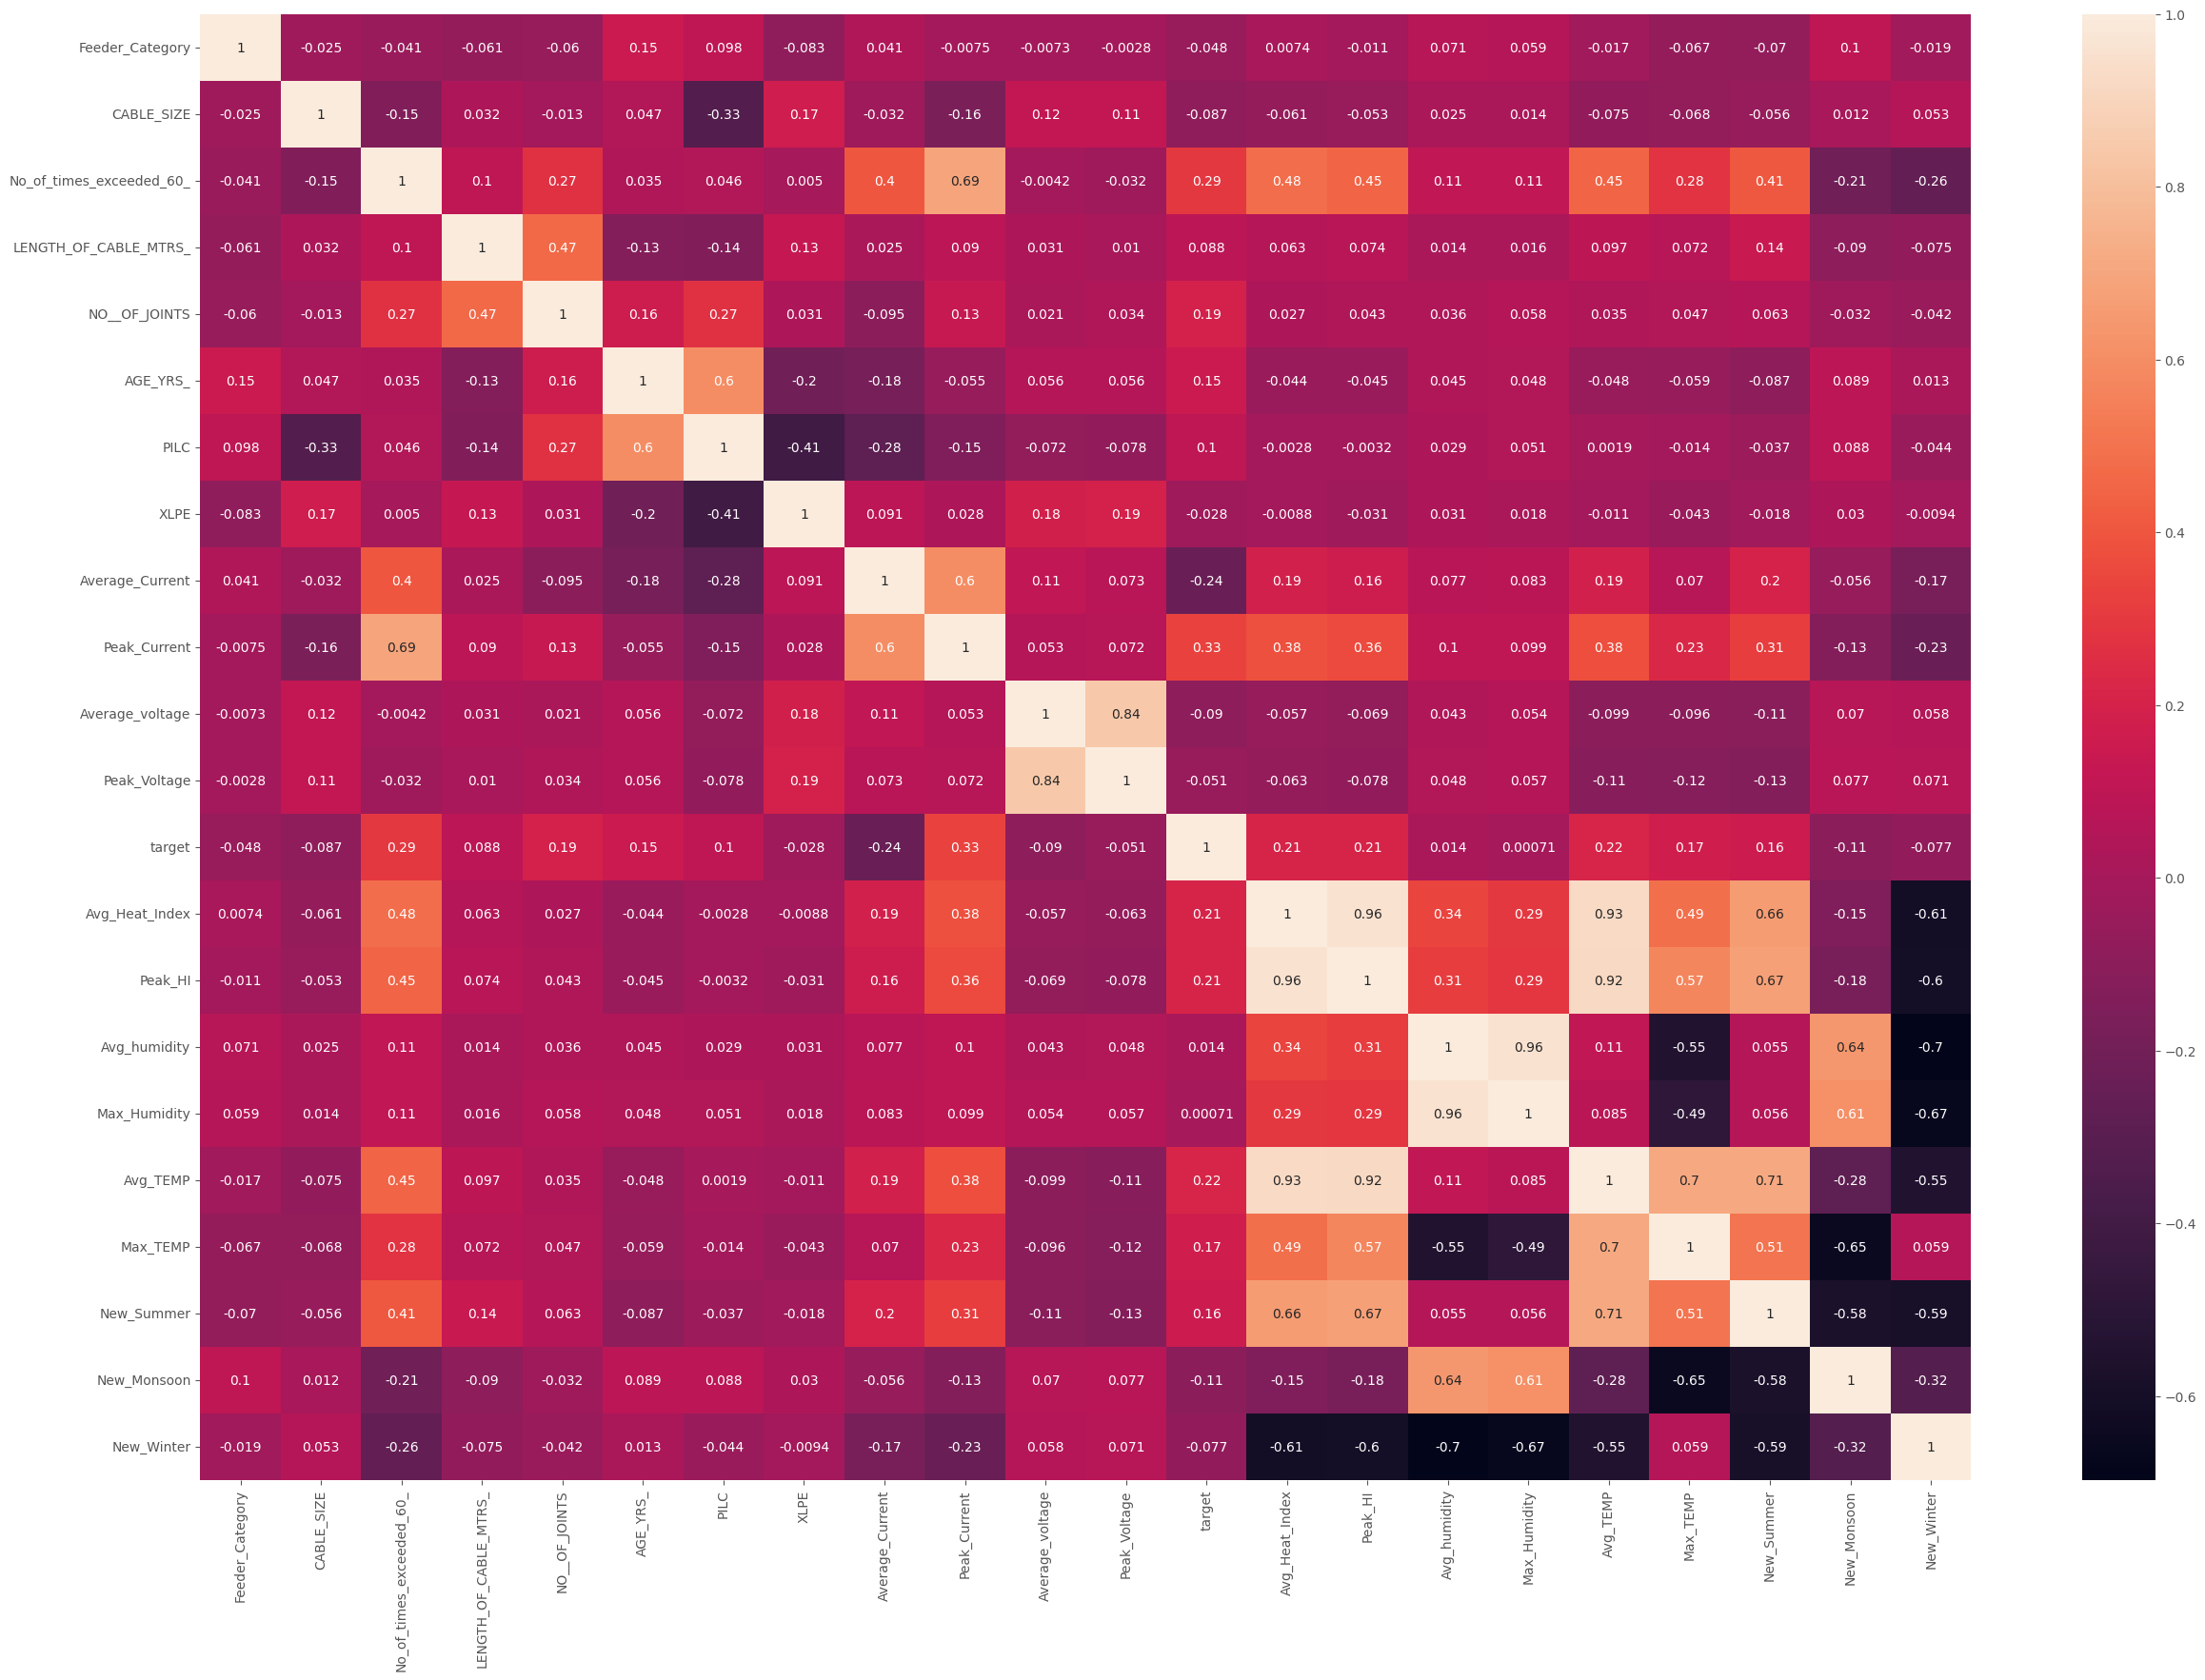

In [601]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

In [602]:
X = df.drop(columns='target')
X_new = X.copy()
y = df['target']

In [603]:
X.values

array([[0., 2., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 7., ..., 1., 0., 0.],
       [0., 1., 7., ..., 1., 0., 0.]])

In [604]:
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X.values)
X_scale"""

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_scale = sc.fit_transform(X.values)\nX_scale'

#### Stratified Sampling 

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [606]:
y_train.value_counts(normalize=True)

target
1.0    0.579167
0.0    0.420833
Name: proportion, dtype: float64

In [607]:
y_test.value_counts(normalize=True)

target
1.0    0.583333
0.0    0.416667
Name: proportion, dtype: float64

#### Gridsearch and hyperparameter tuning

##### Logistic Regression

In [608]:
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(X_train, y_train)

print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8861907875876366
best parameters are: {'C': 10.0, 'penalty': 'l2'}


C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\YR272YB\.virtualenvs\Global

[[20  5]
 [ 5 30]]
0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        25
         1.0       0.86      0.86      0.86        35

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



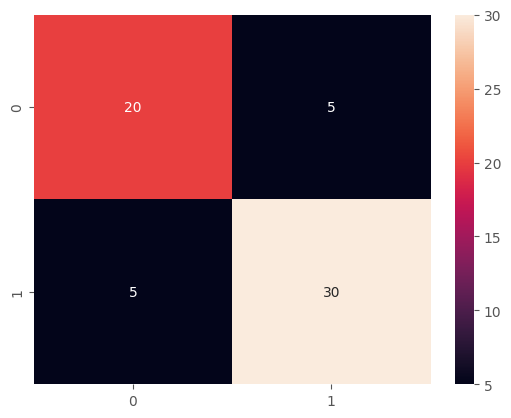

In [610]:
# checking model performance
y_predicted= gridsearch_log.predict(X_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

#### Decision Tree

In [611]:
dt= DecisionTreeClassifier()

# selecting hyperparameter tuning
dt_param= { 
           "max_features": ["auto", "sqrt", "log2"],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)
gridsearch_log= GridSearchCV(dt, dt_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(X_train, y_train)

print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
best score is: 0.771303231925365
best parameters are: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[[14 11]
 [15 20]]
0.5666666666666667
              precision    recall  f1-score   support

         0.0       0.48      0.56      0.52        25
         1.0       0.65      0.57      0.61        35

    accuracy                           0.57        60
   macro avg       0.56      0.57      0.56        60
weighted avg       0.58      0.57      0.57        60



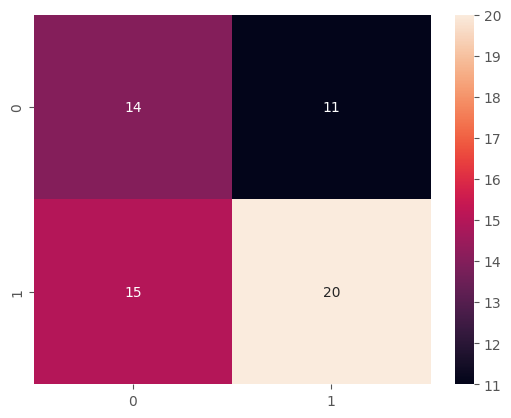

In [613]:
# checking model performance
y_predicted= gridsearch_log.predict(X_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

#### Random Forest

In [614]:
# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)
randomsearch_rf.fit(X_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.7420143803066004
best parameters are: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


[[16  9]
 [ 4 31]]
0.7833333333333333
              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71        25
         1.0       0.78      0.89      0.83        35

    accuracy                           0.78        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.79      0.78      0.78        60



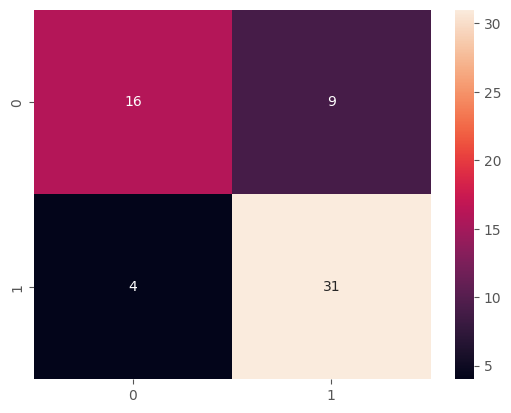

In [615]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(X_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

#### Observations :

* so in terms of model performance Logistic regression gives better results compared to Decision Tree and Random forest

In [616]:
algos = [LogisticRegression(), 
         DecisionTreeClassifier(), 
         RandomForestClassifier(),
         XGBClassifier()]

names = ["Logistic Regression",
         "DecisionTree Classifier",
         "RandomForest Classifier",
         "XGBClassifier"]

acc = []
pre = []
rec = []
f1 = []
r_a = []

In [617]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    reca = recall_score(y_test,y_pred)
    f1_sc = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    
    acc.append(accu) 
    pre.append(prec)
    rec.append(rec)
    f1.append(f1_score)
    r_a.append(roc_auc)

C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [618]:
pd.DataFrame({'Name':names,
           'Accuracy_Score':acc, 
          'Precision' : pre,
          'Recall' : reca,
          'F_1 Score ': f1_sc,
          'ROC_AUC' : r_a})

,Name,Accuracy_Score,Precision,Recall,F_1 Score,ROC_AUC
0,Logistic Regression,0.850000,0.882353,0.885714,0.885714,0.848571
1,DecisionTree Classifier,0.783333,0.805556,0.885714,0.885714,0.774286
2,RandomForest Classifier,0.800000,0.794872,0.885714,0.885714,0.782857
3,XGBClassifier,0.866667,0.885714,0.885714,0.885714,0.862857


#### Calculating the odds ratio for Logistic regression 

In [619]:
lr = LogisticRegression(penalty='none',C=1.0)
lr.fit(X_train,y_train)
odds_ratio=np.exp(lr.coef_)
odds_ratio

C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.97188013, 0.96807677, 1.02083558, 0.99942634, 1.04092879,
        1.03311669, 0.97685458, 1.02687227, 0.84053473, 1.11601148,
        0.91596981, 0.84525697, 1.05415464, 0.98196477, 1.0367873 ,
        0.9598336 , 1.05207618, 1.00687476, 0.99713246, 1.02121649,
        0.9822317 ]])

In [620]:
a = [i for i in odds_ratio[0]]
b = lr.feature_names_in_.tolist()

m = pd.DataFrame({
    'Features':b,
    'Odds Ratio':a})
m

,Features,Odds Ratio
0,Feeder_Category,0.971880
1,CABLE_SIZE,0.968077
2,No_of_times_exceeded_60_,1.020836
3,LENGTH_OF_CABLE_MTRS_,0.999426
4,NO__OF_JOINTS,1.040929
5,AGE_YRS_,1.033117
6,PILC,0.976855
7,XLPE,1.026872
8,Average_Current,0.840535
9,Peak_Current,1.116011


* odds ratio (OR) is the relationship between the probability P of the occurrence of an event A and the probability 1 - P(A) 
of event A not occuring.
* The mathematical expression is P(A)/(1-P(A)). 
* OR > 1 imply that A has a greater probability of happening than not happening, OR < 1 is the opposite. 
* The numerator is the probability between 0 and 1.0 of the event occurring. 
* The denominator is the probability between 0 and 1.0 of the event not occurring. 
* The sum of both probabilities equals 1.0 which explains the subtraction from 1.0 to obtain the probability of the event not occurring after you know the probability of the event occurring. 

In [621]:
m['Probabilty_Faulty'] = m['Odds Ratio']/(1+m['Odds Ratio'])

In [622]:
m['Probabilty_Non_Faulty'] = 1 - m['Probabilty_Faulty']
m

,Features,Odds Ratio,Probabilty_Faulty,Probabilty_Non_Faulty
0,Feeder_Category,0.971880,0.492870,0.507130
1,CABLE_SIZE,0.968077,0.491890,0.508110
2,No_of_times_exceeded_60_,1.020836,0.505155,0.494845
3,LENGTH_OF_CABLE_MTRS_,0.999426,0.499857,0.500143
4,NO__OF_JOINTS,1.040929,0.510027,0.489973
5,AGE_YRS_,1.033117,0.508144,0.491856
6,PILC,0.976855,0.494146,0.505854
7,XLPE,1.026872,0.506629,0.493371
8,Average_Current,0.840535,0.456680,0.543320
9,Peak_Current,1.116011,0.527413,0.472587


#### Decision Tree Plot

In [820]:
dt = DecisionTreeClassifier(criterion='gini',
                           max_depth=10,
                           max_features='sqrt',
                           min_samples_leaf=1,
                           min_samples_split=12)
model = dt.fit(X_train,y_train)

In [821]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8958333333333334
0.7166666666666667


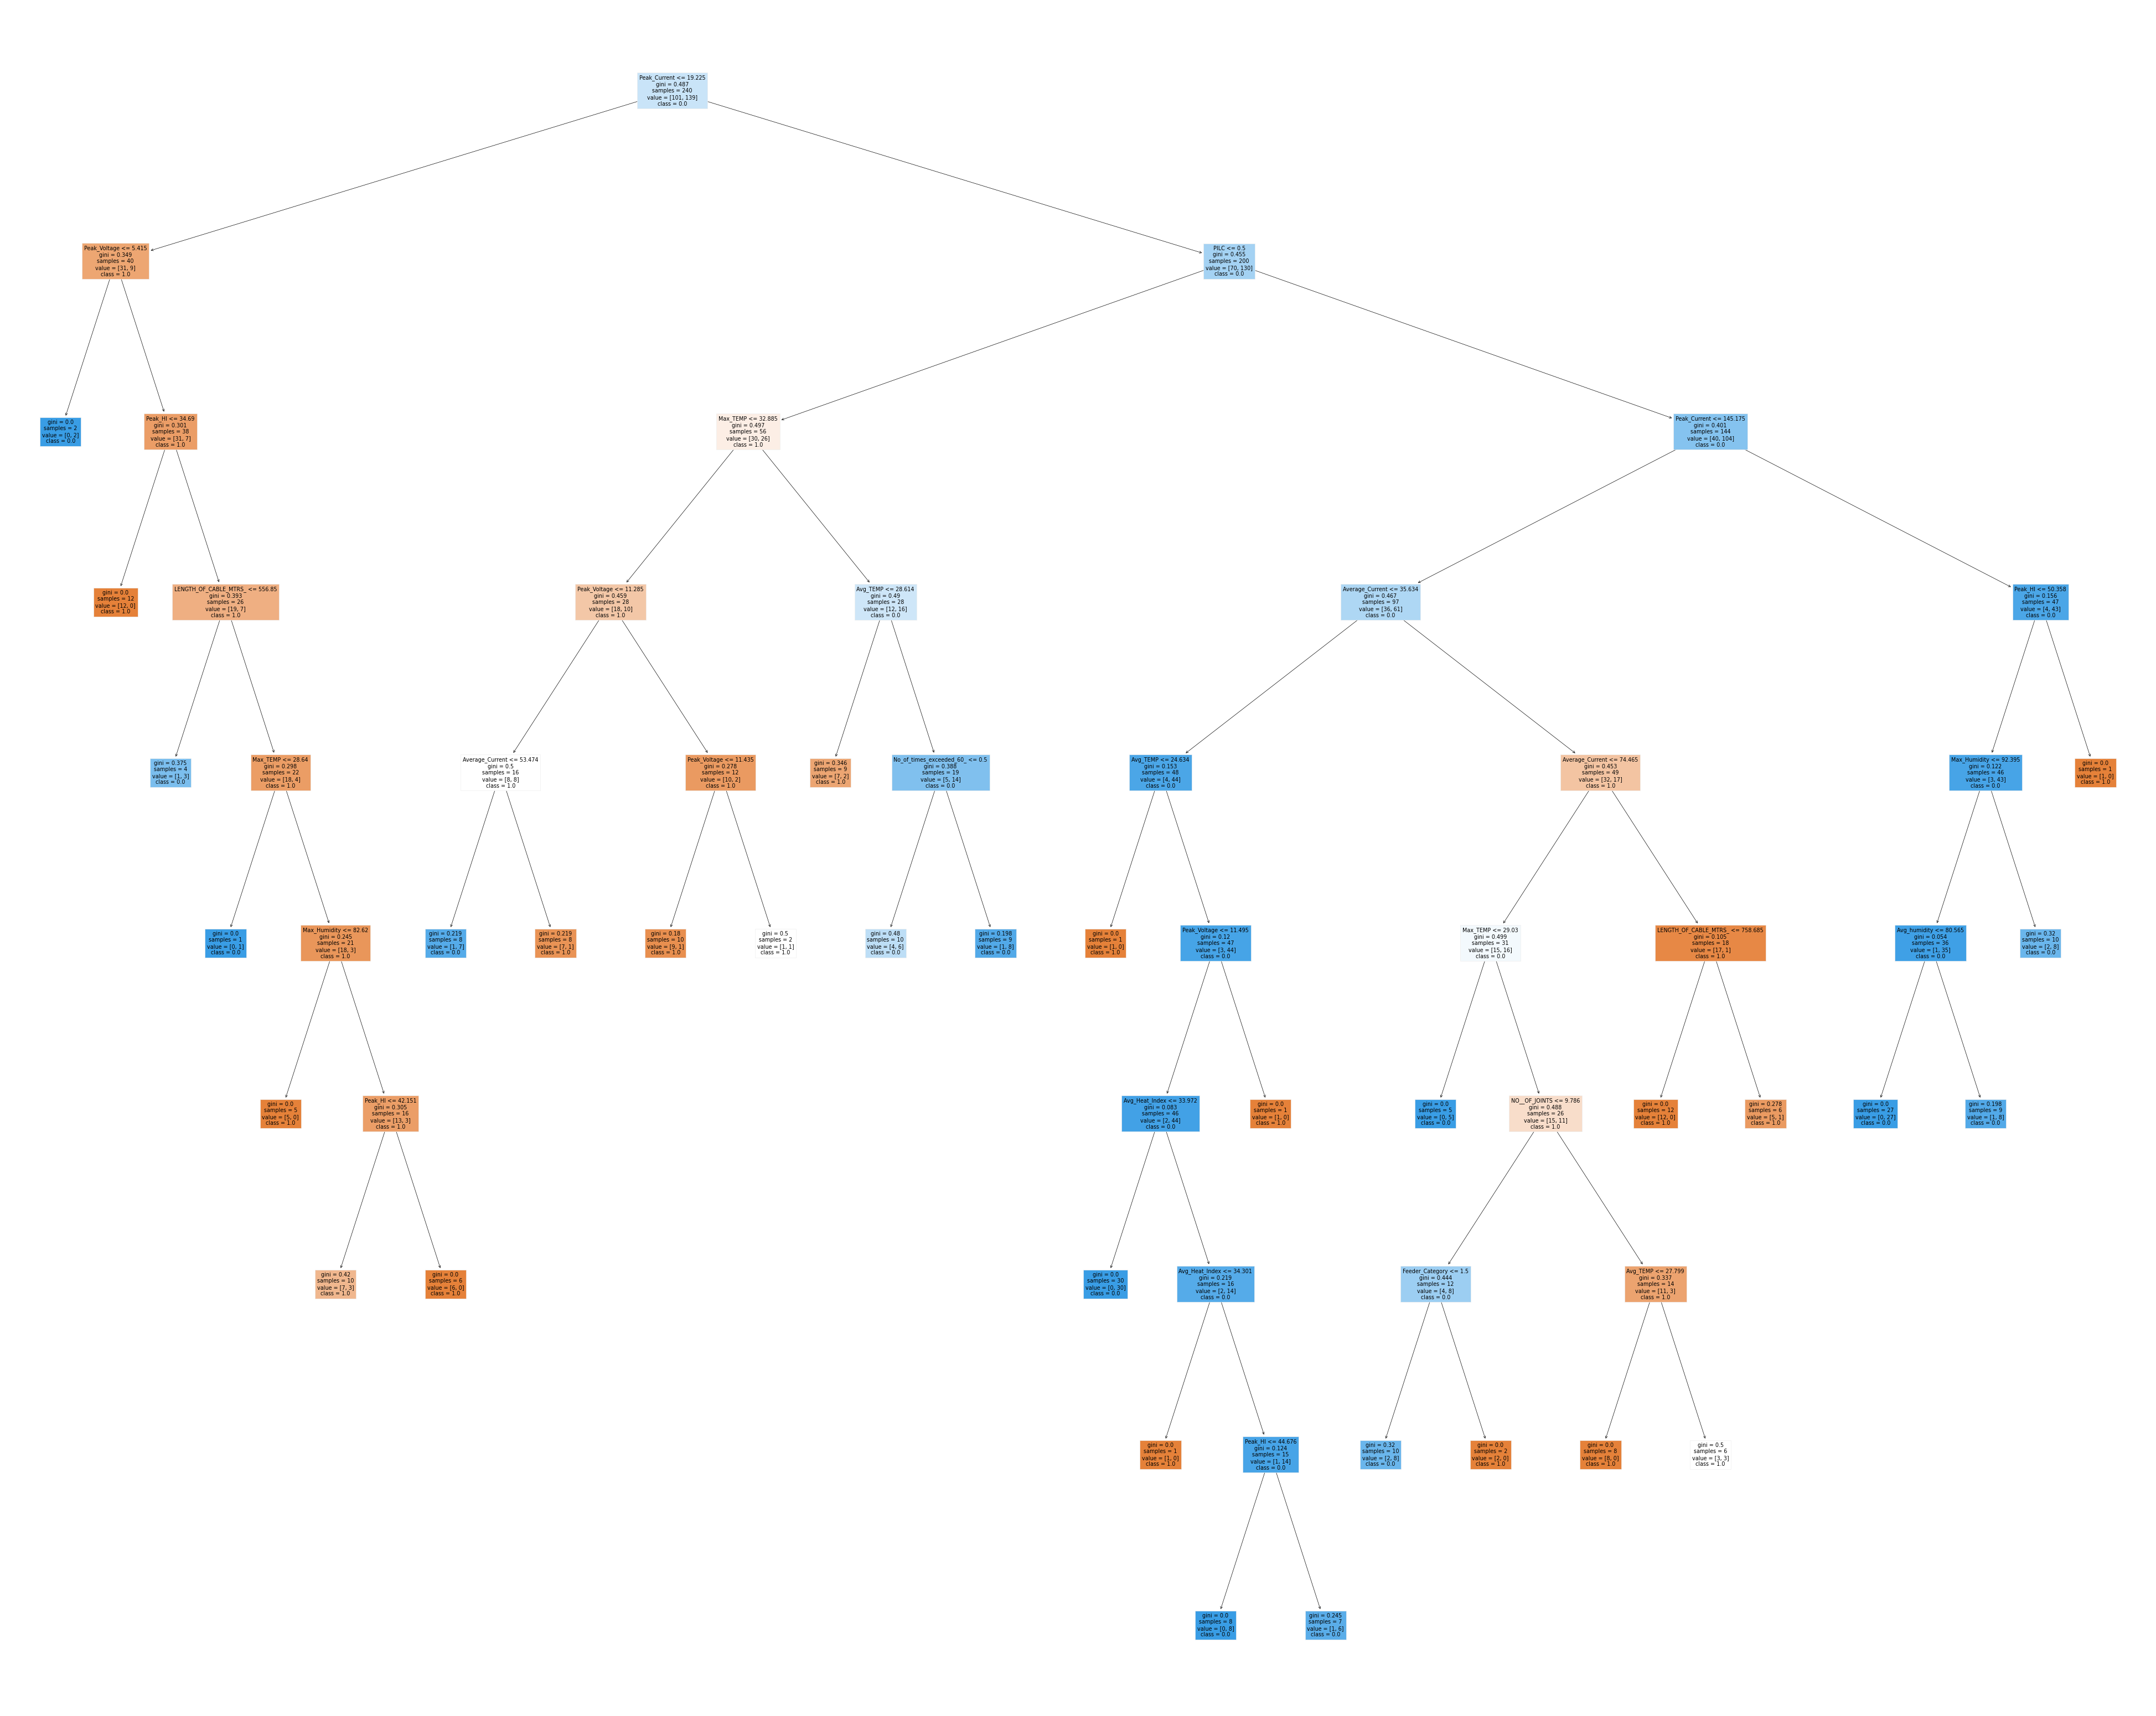

In [822]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=y_train.values.astype(str),
                   filled=True)

In [823]:
X_test.columns

Index(['Feeder_Category', 'CABLE_SIZE', 'No_of_times_exceeded_60_',
       'LENGTH_OF_CABLE_MTRS_', 'NO__OF_JOINTS', 'AGE_YRS_', 'PILC', 'XLPE',
       'Average_Current', 'Peak_Current', 'Average_voltage', 'Peak_Voltage',
       'Avg_Heat_Index', 'Peak_HI', 'Avg_humidity', 'Max_Humidity', 'Avg_TEMP',
       'Max_TEMP', 'New_Summer', 'New_Monsoon', 'New_Winter'],
      dtype='object')

In [824]:
pd.DataFrame({
    "Features": X_train.columns,
    "Imp":model.feature_importances_})

,Features,Imp
0,Feeder_Category,0.026421
1,CABLE_SIZE,0.000000
2,No_of_times_exceeded_60_,0.009792
3,LENGTH_OF_CABLE_MTRS_,0.029817
4,NO__OF_JOINTS,0.032754
5,AGE_YRS_,0.000000
6,PILC,0.066446
7,XLPE,0.000000
8,Average_Current,0.310515
9,Peak_Current,0.213291


In [825]:
model.get_n_leaves()
## So we have total 25 leaf nodes in the decision tree

31

In [826]:
## Prediction on test set
class_pred = dt.predict(X_test)
class_prob_test = model.predict_proba(X_test)
#print(max(class_prob_test[0]))
#print(class_pred[0])

print(class_prob_test)
print(class_pred)

[[0.14285714 0.85714286]
 [0.         1.        ]
 [0.7        0.3       ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.11111111 0.88888889]
 [0.5        0.5       ]
 [0.         1.        ]
 [0.2        0.8       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.2        0.8       ]
 [0.         1.        ]
 [0.2        0.8       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.11111111 0.88888889]
 [0.         1.        ]
 [0.11111111 0.88888889]
 [0.         1.        ]
 [0.125      0.875     ]
 [0.         1.        ]
 [0.11111111 0.88888889]
 [0.         1.        ]
 [1.         0.        ]
 [0.2        0.8       ]
 [0.9        0.1       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.5        0.5       ]
 [0.         1.        ]
 [0.11111111 0.88888889]
 [0.2        0.8       ]
 [1.         0.        ]
 [0.2        0.8       ]
 [0.2        0.8       ]
 [0.125      0.875     ]
 [0.         1.        ]
 [1.         0.        ]


In [827]:
ab = []
for i in class_prob_test[:,0]:
    if i <= 0.5:
        ab.append("Low")
    elif i>0.5 and i<=0.75:
        ab.append("Need Further Evaluation")
    else:
        ab.append("High") 

In [828]:
#pd.DataFrame(list(zip(class_prob_test[:,0],class_pred,ab,y_test)), columns =['Prob', 'Predicted_class','class','Actual Class'])
a = pd.DataFrame(list(zip(class_prob_test,class_pred,ab,y_test)), columns =['Prob', 'Predicted_class','class','Actual Class'])
a[a['Predicted_class'] != a['Actual Class']].shape

(17, 4)

In [829]:
p_n = dt.predict(X_new)
ac_cl = y
m = pd.DataFrame({
    "p":p_n,
    "a":ac_cl
})

m[m['p'] != m['a']].shape

(42, 2)